In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sb
import scipy.stats as stats
import datetime as dt
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import pingouin as pg

# read dataset 
df = pd.read_csv('all_features_by_state.csv')
df.head()

,Unnamed: 0,CensusTract,State_x,HUNVFlag_x,LILATracts_1And10_x,LILATracts_halfAnd10_x,LILATracts_Vehicle_x,LATracts1_y,LATracts10_y,LATracts20_y,...,B08137_002E_diff,B19326_001E_diff,B19301_001E_diff,B19131_002E_diff,B19131_003E_diff,B19126_001E_diff,B03002_009E_diff,B03002_010E_diff,B03002_011E_diff,entropy_diff
0,1400000US02013000100,2013000100,Alaska,1,1,1,1,1,1,1,...,378,3051.0,6329.0,159,72,2663.0,-46,0,-46,-0.212302
1,1400000US02016000100,2016000100,Alaska,0,1,1,1,1,1,1,...,146,-2816.0,-9929.0,34,22,-1354.0,-35,0,-35,0.199189
2,1400000US02016000200,2016000200,Alaska,0,0,0,0,1,0,0,...,322,6177.0,6451.0,246,152,4327.0,117,0,117,-0.160704
3,1400000US02020000101,2020000101,Alaska,0,0,0,0,1,0,0,...,-143,-6171.0,6711.0,-107,-13,NaN,359,0,359,-0.106327
4,1400000US02020000102,2020000102,Alaska,0,0,0,0,1,0,0,...,369,-7766.0,-2535.0,194,57,9355.0,117,0,117,0.018110


In [3]:
# inspect first 5 rows
df.head()

,Unnamed: 0,CensusTract,State_x,HUNVFlag_x,LILATracts_1And10_x,LILATracts_halfAnd10_x,LILATracts_Vehicle_x,LATracts1_y,LATracts10_y,LATracts20_y,...,B08137_002E_diff,B19326_001E_diff,B19301_001E_diff,B19131_002E_diff,B19131_003E_diff,B19126_001E_diff,B03002_009E_diff,B03002_010E_diff,B03002_011E_diff,entropy_diff
0,1400000US02013000100,2013000100,Alaska,1,1,1,1,1,1,1,...,378,3051.0,6329.0,159,72,2663.0,-46,0,-46,-0.212302
1,1400000US02016000100,2016000100,Alaska,0,1,1,1,1,1,1,...,146,-2816.0,-9929.0,34,22,-1354.0,-35,0,-35,0.199189
2,1400000US02016000200,2016000200,Alaska,0,0,0,0,1,0,0,...,322,6177.0,6451.0,246,152,4327.0,117,0,117,-0.160704
3,1400000US02020000101,2020000101,Alaska,0,0,0,0,1,0,0,...,-143,-6171.0,6711.0,-107,-13,NaN,359,0,359,-0.106327
4,1400000US02020000102,2020000102,Alaska,0,0,0,0,1,0,0,...,369,-7766.0,-2535.0,194,57,9355.0,117,0,117,0.018110


In [4]:
# check the columns 
list(df.columns)

['Unnamed: 0',
 'CensusTract',
 'State_x',
 'HUNVFlag_x',
 'LILATracts_1And10_x',
 'LILATracts_halfAnd10_x',
 'LILATracts_Vehicle_x',
 'LATracts1_y',
 'LATracts10_y',
 'LATracts20_y',
 'LATracts_half_y',
 'LATracts1_x',
 'LATracts10_x',
 'LATracts20_x',
 'LATracts_half_x',
 'LILATracts_1And20_x',
 'HUNVFlag_y',
 'LILATracts_1And10_y',
 'LILATracts_halfAnd10_y',
 'LILATracts_Vehicle_y',
 'LILATracts_1And20_y',
 'entropy_index10_y',
 'entropy_index15_x',
 'HUNVFlag_diff',
 'LILATracts_1And10_diff',
 'LILATracts_halfAnd10_diff',
 'LILATracts_Vehicle_diff',
 'LILATracts_1And20_diff',
 'LATracts1_diff',
 'LATracts10_diff',
 'LATracts20_diff',
 'LATracts_half_diff',
 'prop_white',
 'prop_black',
 'prop_asian',
 'prop_hisp',
 'prop_nhopi',
 'prop_aian',
 'prop_multir',
 'totalprop',
 'totalpop10',
 'prop_white10',
 'prop_black10',
 'prop_asian10',
 'prop_hisp10',
 'prop_nhopi10',
 'prop_aian10',
 'prop_multir10',
 'Unnamed: 0_x',
 'STATE2010',
 'NAME2010',
 'B01001_001E2010',
 'B01001_002E201

# Cases

2010 map:
-- all states, in red food desert in 2010 

2015 map:
-- all states, food desert in 2015

In [5]:
# low access 1 and 10 miles
no_desert = df[df['LATracts10_diff'] == -1]

# same situation 
same_access = df[df['LATracts10_diff'] == 0]

# food desert appeared
yes_desertdf = df[df['LATracts10_diff'] == 1]

In [6]:
# counts 
print('places where food desert disappeared', no_desert.shape) 

print('places where no change in food desert', same_access.shape)

print('places where food desert appeared', yes_desertdf.shape)

places where food desert disappeared (462, 133)
places where no change in food desert (63841, 133)
places where food desert appeared (270, 133)


In [7]:
# see states represented where food desert disappeared
no_desert['State_x'].unique()

array(['Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Indiana', 'Iowa',
       'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont'], dtype=object)

In [8]:
# low access disappeared 
def no_desert(row):
    if row['LATracts10_diff'] == -1:
        return 1
    elif row['LATracts10_diff'] != np.nan:
        return 0

def yes_desert(row):
    if row['LATracts10_diff'] == 1:
        return 1
    elif row['LATracts10_diff'] != np.nan:
        return 0
    
# apply created function
df['disappeared_food_desert'] = df.apply(no_desert, axis=1)
df['appeared_food_desert'] = df.apply(yes_desert, axis=1)

# Standardize the features

In [9]:
# new df 
scaled_features = df

# columns to standardize 
col_names = ['B01001_002E_diff','B01001_026E_diff','B01002_001E_diff', 'B01003_001E_diff',
             'B19037_001E_diff','B19001_001E_diff','B17023_001E_diff',
             'B17020A_014E_diff','B08303_002E_diff','B08303_010E_diff','B08301_010E_diff',
             'B08301_002E_diff','B08202_004E_diff','B08202_020E_diff','B08137_002E_diff',
             'B19326_001E_diff','B19301_001E_diff','B19131_002E_diff','B19131_003E_diff',
             'B19126_001E_diff','B03002_009E_diff','B03002_010E_diff','B03002_011E_diff',
            'entropy_diff']

# select cols of interest
features = scaled_features[col_names]

# scale 
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

# assign scaled vars 
scaled_features[col_names] = features
scaled_features.head()



,Unnamed: 0,CensusTract,State_x,HUNVFlag_x,LILATracts_1And10_x,LILATracts_halfAnd10_x,LILATracts_Vehicle_x,LATracts1_y,LATracts10_y,LATracts20_y,...,B19301_001E_diff,B19131_002E_diff,B19131_003E_diff,B19126_001E_diff,B03002_009E_diff,B03002_010E_diff,B03002_011E_diff,entropy_diff,disappeared_food_desert,appeared_food_desert
0,1400000US02013000100,2013000100,Alaska,1,1,1,1,1,1,1,...,-0.001204,1.047331,0.863848,0.004336,-0.718226,-0.032205,-0.729326,-0.355321,0,0
1,1400000US02016000100,2016000100,Alaska,0,1,1,1,1,1,1,...,-0.004782,0.237605,0.388921,0.004215,-0.602022,-0.032205,-0.610243,1.927376,0,0
2,1400000US02016000200,2016000200,Alaska,0,0,0,0,1,0,0,...,-0.001177,1.610901,1.623731,0.004386,1.003694,-0.032205,1.035265,-0.069088,0,0
3,1400000US02020000101,2020000101,Alaska,0,0,0,0,1,0,0,...,-0.001120,-0.675766,0.056472,NaN,3.560165,-0.032205,3.655086,0.232564,0,0
4,1400000US02020000102,2020000102,Alaska,0,0,0,0,1,0,0,...,-0.003155,1.274055,0.721370,0.004536,1.003694,-0.032205,1.035265,0.922863,0,0


# Correlation matrixes 

In [10]:
# this looks at the correlation between all the subitems of engagement item
corrMatrix = df[['disappeared_food_desert', 'B01001_002E_diff','B01001_026E_diff','B01002_001E_diff', 'B01003_001E_diff',
             'B19037_001E_diff','B19001_001E_diff','B17023_001E_diff']].corr()
print(round(corrMatrix, 2))

                         disappeared_food_desert  B01001_002E_diff  \
disappeared_food_desert                     1.00             -0.01   
B01001_002E_diff                           -0.01              1.00   
B01001_026E_diff                           -0.01              0.52   
B01002_001E_diff                            0.00              0.00   
B01003_001E_diff                           -0.01              0.88   
B19037_001E_diff                           -0.01              0.61   
B19001_001E_diff                           -0.01              0.61   
B17023_001E_diff                           -0.01              0.62   

                         B01001_026E_diff  B01002_001E_diff  B01003_001E_diff  \
disappeared_food_desert             -0.01               0.0             -0.01   
B01001_002E_diff                     0.52               0.0              0.88   
B01001_026E_diff                     1.00               0.0              0.87   
B01002_001E_diff                     0.00    

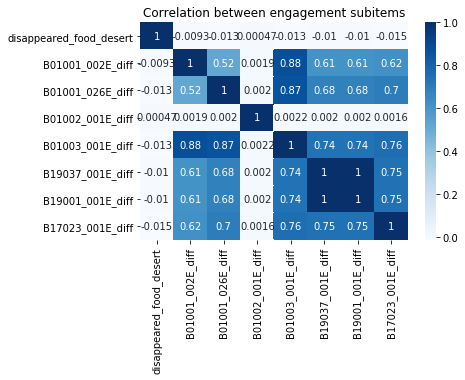

In [11]:
# visualize matrix 
sb.heatmap(corrMatrix, annot = True, cmap = "Blues")
plt.title("Correlation between engagement subitems")
plt.show()

In [12]:
# this looks at the correlation between all the subitems of engagement item
corrMatrix2 = df[['disappeared_food_desert','B17020A_014E_diff','B08303_002E_diff','B08303_010E_diff','B08301_010E_diff',
             'B08301_002E_diff','B08202_004E_diff','B08202_020E_diff','B08137_002E_diff']].corr()
print(round(corrMatrix2, 2)) 
 

                         disappeared_food_desert  B17020A_014E_diff  \
disappeared_food_desert                     1.00              -0.01   
B17020A_014E_diff                          -0.01               1.00   
B08303_002E_diff                           -0.00               0.00   
B08303_010E_diff                           -0.01               0.09   
B08301_010E_diff                           -0.01               0.02   
B08301_002E_diff                           -0.01               0.35   
B08202_004E_diff                           -0.01               0.20   
B08202_020E_diff                           -0.00               0.06   
B08137_002E_diff                           -0.01               0.24   

                         B08303_002E_diff  B08303_010E_diff  B08301_010E_diff  \
disappeared_food_desert             -0.00             -0.01             -0.01   
B17020A_014E_diff                    0.00              0.09              0.02   
B08303_002E_diff                     1.00     

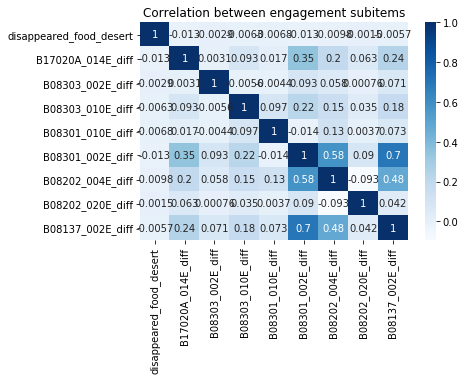

In [13]:
# visualize matrix 
sb.heatmap(corrMatrix2, annot = True, cmap = "Blues")
plt.title("Correlation between engagement subitems")
plt.show()

In [14]:
# this looks at the correlation between all the subitems of engagement item
corrMatrix3 = df[['disappeared_food_desert', 'B19326_001E_diff','B19301_001E_diff','B19131_002E_diff','B19131_003E_diff',
             'B19126_001E_diff','B03002_009E_diff','B03002_010E_diff','B03002_011E_diff']].corr()
print(round(corrMatrix3, 2)) 
 

                         disappeared_food_desert  B19326_001E_diff  \
disappeared_food_desert                     1.00              0.00   
B19326_001E_diff                            0.00              1.00   
B19301_001E_diff                           -0.00              1.00   
B19131_002E_diff                           -0.01              0.00   
B19131_003E_diff                           -0.00             -0.00   
B19126_001E_diff                           -0.01              0.26   
B03002_009E_diff                           -0.01              0.00   
B03002_010E_diff                           -0.00              0.00   
B03002_011E_diff                           -0.01              0.00   

                         B19301_001E_diff  B19131_002E_diff  B19131_003E_diff  \
disappeared_food_desert             -0.00             -0.01             -0.00   
B19326_001E_diff                     1.00              0.00             -0.00   
B19301_001E_diff                     1.00              0

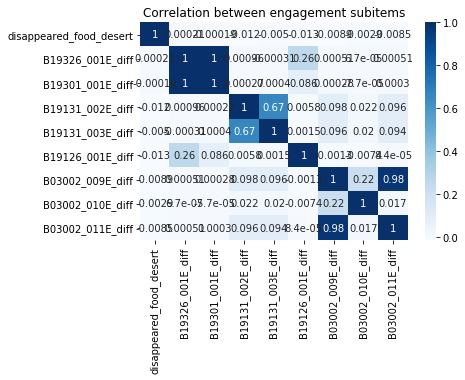

In [15]:
# visualize matrix 
sb.heatmap(corrMatrix3, annot = True, cmap = "Blues")
plt.title("Correlation between engagement subitems")
plt.show()

# Logistic regression

Notes:
- goal: what causes the change in food desert status?
- use 2010 data to do logit, predict 2015, but we have the answer 
- difference in difference -- can explain change for random -- not appropriate thoooo bc changes is not random 
- take differences, and predict based of the change 
- ind vars would be the change between 2015 and 2017 -- what scale the change needs to be on? 
- need to scale standardscaler to scale variables -- take difference and then scale the difference 
- absolute differences  vs indicator (dont need to scale indicator) 

## Logistic regression using Statsmodel

In [16]:
scaled_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64573 entries, 0 to 64572
Columns: 135 entries, Unnamed: 0 to appeared_food_desert
dtypes: float64(47), int64(84), object(4)
memory usage: 66.5+ MB


In [17]:
# identify the independent variables 
ind_cols = ['B01001_002E_diff','B01001_026E_diff','B01002_001E_diff', 'B01003_001E_diff',
            'B19001_001E_diff','B17023_001E_diff', 'entropy_diff',
             'B17020A_014E_diff','B08303_002E_diff','B08303_010E_diff','B08301_010E_diff',
             'B08301_002E_diff','B08202_004E_diff','B08202_020E_diff','B08137_002E_diff',
             'B19326_001E_diff','B19131_002E_diff','B19131_003E_diff',
             'B19126_001E_diff','B03002_009E_diff']

logit = sm.Logit(scaled_features['disappeared_food_desert'], sm.add_constant(scaled_features[ind_cols]), 
                 missing='drop')
result = logit.fit_regularized()


//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.040884310831167635
            Iterations: 89
            Function evaluations: 89
            Gradient evaluations: 89


In [28]:
print(result.summary()) #this is the one

                              Logit Regression Results                             
Dep. Variable:     disappeared_food_desert   No. Observations:                17739
Model:                               Logit   Df Residuals:                    17718
Method:                                MLE   Df Model:                           20
Date:                     Mon, 25 Jan 2021   Pseudo R-squ.:                 0.01862
Time:                             21:22:34   Log-Likelihood:                -725.25
converged:                            True   LL-Null:                       -739.01
Covariance Type:                 nonrobust   LLR p-value:                    0.1212
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.0860      0.102    -49.736      0.000      -5.286      -4.886
B01001_002E_diff      0.0603   2.42e+06   2.49e-08      1.000   -4.75e

In [26]:
# identify the independent variables 
ind_cols2 = ['B19001_001E_diff','B17023_001E_diff', 'entropy_diff',
             'B17020A_014E_diff','B08303_002E_diff','B08303_010E_diff','B08301_010E_diff',
             'B08301_002E_diff','B08202_004E_diff','B08202_020E_diff','B08137_002E_diff',
             'B19326_001E_diff','B19131_002E_diff','B19131_003E_diff',
             'B19126_001E_diff','B03002_009E_diff']

# identify the independent variables 
ind_cols15 = ['B19001_001E2015','B17023_001E2015', 
             'B17020A_014E2015','B08303_002E2015','B08303_010E2015','B08301_010E2015',
             'B08301_002E2015','B08202_004E2015','B08202_020E2015','B08137_002E2015',
             'B19326_001E2015','B19131_002E2015','B19131_003E2015',
             'B19126_001E2015','B03002_009E2015']

logit2 = sm.Logit(scaled_features['disappeared_food_desert'], sm.add_constant(scaled_features[ind_cols15]), 
                 missing='drop')
result2 = logit2.fit_regularized()

Iteration limit exceeded    (Exit mode 9)
            Current function value: inf
            Iterations: 1001
            Function evaluations: 11001
            Gradient evaluations: 1001


//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [27]:
print(result2.summary())

                              Logit Regression Results                             
Dep. Variable:     disappeared_food_desert   No. Observations:                17739
Model:                               Logit   Df Residuals:                    17723
Method:                                MLE   Df Model:                           15
Date:                     Mon, 25 Jan 2021   Pseudo R-squ.:                    -inf
Time:                             21:21:58   Log-Likelihood:                   -inf
converged:                           False   LL-Null:                       -739.01
Covariance Type:                 nonrobust   LLR p-value:                     1.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7.317e-06      0.569   1.29e-05      1.000      -1.115       1.115
B19001_001E2015  -3.996e-08      0.000   -8.2e-05      1.000      -0.001 

In [24]:
params = result.params
conf = result.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                         5%       95%  Odds Ratio
const              0.005060  0.007555    0.006183
B01001_002E_diff   0.000000       inf    1.062146
B01001_026E_diff   0.000000       inf    0.977564
B01002_001E_diff   0.394666  2.721018    1.036288
B01003_001E_diff   0.000000       inf    1.022372
B19001_001E_diff   0.768443  1.496894    1.072510
B17023_001E_diff   0.650527  1.480799    0.981478
entropy_diff       1.279031  1.977974    1.590562
B17020A_014E_diff  0.701598  1.061824    0.863119
B08303_002E_diff   0.897218  1.108152    0.997123
B08303_010E_diff   0.811843  1.206494    0.989689
B08301_010E_diff   0.723991  1.170142    0.920419
B08301_002E_diff   0.701689  1.429141    1.001405
B08202_004E_diff   0.849447  1.421187    1.098737
B08202_020E_diff   0.739601  1.167991    0.929434
B08137_002E_diff   0.727439  1.276789    0.963735
B19326_001E_diff   0.449123  2.116268    0.974917
B19131_002E_diff   0.551012  1.177695    0.805558
B19131_003E_diff   0.773397  1.351832    1.022498


vif -- matthew suggestion -- which features gives you the more problem w multilinearity 
-- after handpicking 

## Logistic regression using pingouin 

Source: https://pingouin-stats.org/generated/pingouin.logistic_regression.html

In [29]:
X = scaled_features[ind_cols]
y = scaled_features['disappeared_food_desert']
lom = pg.logistic_regression(X, y, remove_na=True)
lom.round(2)

,names,coef,se,z,pval,CI[2.5%],CI[97.5%]
0,Intercept,-5.09,0.12,-42.13,0.00,-5.32,-4.85
1,B01001_002E_diff,0.06,0.11,0.57,0.57,-0.15,0.27
2,B01001_026E_diff,-0.02,0.13,-0.18,0.86,-0.27,0.23
3,B01002_001E_diff,0.08,11.54,0.01,0.99,-22.54,22.70
4,B01003_001E_diff,0.02,0.07,0.30,0.76,-0.12,0.17
5,B19001_001E_diff,0.07,0.17,0.41,0.68,-0.26,0.40
6,B17023_001E_diff,-0.02,0.21,-0.09,0.93,-0.43,0.39
7,entropy_diff,0.46,0.11,4.17,0.00,0.25,0.68
8,B17020A_014E_diff,-0.15,0.11,-1.39,0.16,-0.35,0.06
9,B08303_002E_diff,-0.00,0.05,-0.05,0.96,-0.11,0.10


In [30]:
lom['odds_ratio'] = np.exp(lom['coef'])
lom['probability'] = lom['odds_ratio'] / (1 + lom['odds_ratio'])
lom

,names,coef,se,z,pval,CI[2.5%],CI[97.5%],odds_ratio,probability
0,Intercept,-5.086229,0.120718,-42.133069,0.000000,-5.322832,-4.849626,0.006181,0.006143
1,B01001_002E_diff,0.060749,0.106693,0.569387,0.569094,-0.148365,0.269863,1.062633,0.515183
2,B01001_026E_diff,-0.023239,0.127628,-0.182084,0.855517,-0.273386,0.226908,0.977029,0.494190
3,B01002_001E_diff,0.077330,11.540083,0.006701,0.994653,-22.540817,22.695476,1.080398,0.519323
4,B01003_001E_diff,0.022450,0.073707,0.304588,0.760680,-0.122012,0.166912,1.022704,0.505612
5,B19001_001E_diff,0.069503,0.170112,0.408571,0.682855,-0.263911,0.402916,1.071975,0.517369
6,B17023_001E_diff,-0.018571,0.209844,-0.088497,0.929482,-0.429858,0.392716,0.981601,0.495357
7,entropy_diff,0.464238,0.111228,4.173748,0.000030,0.246235,0.682240,1.590801,0.614019
8,B17020A_014E_diff,-0.146907,0.105703,-1.389811,0.164586,-0.354080,0.060267,0.863374,0.463339
9,B08303_002E_diff,-0.002877,0.053720,-0.053552,0.957292,-0.108167,0.102413,0.997127,0.499281


## Appeared Food Desert

In [31]:
X2 = scaled_features[ind_cols]
y2 = scaled_features['appeared_food_desert']
lom2 = pg.logistic_regression(X2, y2, remove_na=True)
lom2.round(2)

//anaconda3/lib/python3.7/site-packages/pingouin/regression.py:887: RuntimeWarning: overflow encountered in cosh
  denom = (2 * (1 + np.cosh(lom.decision_function(X))))


,names,coef,se,z,pval,CI[2.5%],CI[97.5%]
0,Intercept,-6.10,0.33,-18.48,0.00,-6.74,-5.45
1,B01001_002E_diff,0.04,0.14,0.31,0.76,-0.24,0.33
2,B01001_026E_diff,-0.29,0.18,-1.60,0.11,-0.64,0.07
3,B01002_001E_diff,54.67,103.71,0.53,0.60,-148.60,257.94
4,B01003_001E_diff,-0.13,0.10,-1.34,0.18,-0.33,0.06
5,B19001_001E_diff,-0.22,0.24,-0.89,0.37,-0.69,0.26
6,B17023_001E_diff,0.07,0.30,0.25,0.81,-0.51,0.65
7,entropy_diff,0.50,0.16,3.19,0.00,0.19,0.81
8,B17020A_014E_diff,-0.16,0.16,-1.06,0.29,-0.47,0.14
9,B08303_002E_diff,-0.09,0.13,-0.68,0.50,-0.34,0.17


In [32]:
lom2['odds_ratio'] = np.exp(lom2['coef'])
lom2['probability'] = lom2['odds_ratio'] / (1 + lom2['odds_ratio'])
lom2

,names,coef,se,z,pval,CI[2.5%],CI[97.5%],odds_ratio,probability
0,Intercept,-6.095443,0.329924,-18.475295,3.264405e-76,-6.742082,-5.448804,2.253112e-03,2.248047e-03
1,B01001_002E_diff,0.044382,0.144001,0.308209,7.579236e-01,-0.237854,0.326618,1.045382e+00,5.110937e-01
2,B01001_026E_diff,-0.285758,0.179014,-1.596288,1.104245e-01,-0.636620,0.065103,7.514442e-01,4.290426e-01
3,B01002_001E_diff,54.666905,103.710359,0.527111,5.981163e-01,-148.601664,257.935474,5.514867e+23,1.000000e+00
4,B01003_001E_diff,-0.134446,0.100690,-1.335248,1.817953e-01,-0.331795,0.062903,8.742000e-01,4.664390e-01
5,B19001_001E_diff,-0.215264,0.241536,-0.891229,3.728062e-01,-0.688667,0.258138,8.063283e-01,4.463908e-01
6,B17023_001E_diff,0.072976,0.296110,0.246448,8.053351e-01,-0.507388,0.653340,1.075704e+00,5.182358e-01
7,entropy_diff,0.501225,0.157325,3.185932,1.442887e-03,0.192875,0.809576,1.650743e+00,6.227472e-01
8,B17020A_014E_diff,-0.164728,0.156028,-1.055764,2.910761e-01,-0.470537,0.141080,8.481242e-01,4.589108e-01
9,B08303_002E_diff,-0.087777,0.129431,-0.678173,4.976617e-01,-0.341456,0.165903,9.159655e-01,4.780699e-01


# We have an output, now what?

https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/how-to/binary-logistic-regression/interpret-the-results/key-results/

### Step 1: Determine whether the association between the response and the term is statistically significant

To determine whether the association between the response and each term in the model is statistically significant, compare the p-value for the term to your significance level to assess the null hypothesis. The null hypothesis is that the term's coefficient is equal to zero, which indicates that there is no association between the term and the response. Usually, a significance level (denoted as α or alpha) of 0.05 works well. A significance level of 0.05 indicates a 5% risk of concluding that an association exists when there is no actual association.

* P-value ≤ α: The association is statistically significant
If the p-value is less than or equal to the significance level, you can conclude that there is a statistically significant association between the response variable and the term.

* P-value > α: The association is not statistically significant
If the p-value is greater than the significance level, you cannot conclude that there is a statistically significant association between the response variable and the term. You may want to refit the model without the term.

<b>If there are multiple predictors without a statistically significant association with the response, you must reduce the model by removing terms one at a time. For more information on removing terms from the model, go to Model reduction.</b> 

If a model term is statistically significant, the interpretation depends on the type of term. 

The interpretations are as follows:
* If a continuous predictor is significant, you can conclude that the coefficient for the predictor does not equal zero.
* If a categorical predictor is significant, you can conclude that not all the level means are equal.

<i>In our model, only one term is statistically significant, entropy_diff. However, we still need to do some model reduction to remove redundancy. </i>

### Step 2: Understand the effects of the predictors

Use the odds ratio to understand the effect of a predictor.

<b>Odds Ratios for Continuous Predictors</b>

Odds ratios that are greater than 1 indicate that the even is more likely to occur as the predictor increases. Odds ratios that are less than 1 indicate that the event is less likely to occur as the predictor increases.

<i> Since our predictors are continuous, we are looking for odds ration more than 1. Entropy_diff is 1.5, indicating that food desert is more likely to disappear as the predictor increases </i>

### Step 3: Determine how well the model fits your data

To determine how well the model fits your data, examine the statistics in the Model Summary table. For binary logistic regression, the data format affects the deviance R2 statistics but not the AIC. For more information, go to For more information, go to How data formats affect goodness-of-fit in binary logistic regression.

<i> our current model has a rsq val of 0.018, which we hope to improve when reducing the model </i> 


# Exporting files

In [ ]:
# food desert appeared
yes_desertdf.to_csv('yesdeserts.csv')